<a href="https://colab.research.google.com/github/kkchaitu27/DeepLearning/blob/master/FoodClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Model to classify food items

This notebook contains code to build deep learing model to classify 101 food items.

Food-101	Bossard, Lukas et al., 2014

101 food categories, with 101,000 images; 250 test images and 750 training images per class. The training images were not cleaned. All images were rescaled to have a maximum side length of 512 pixels.

Achieved 84% Accuracy with 4 epochs which is much better than 50.8% obtained in the paper. More epochs will increase the accuracy.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import fastai code

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

Batch Size for the model

In [0]:
bs = 64

Download Food Dataset

Food-101 Bossard, Lukas et al., 2014

101 food categories, with 101,000 images; 250 test images and 750 training images per class. The training images were not cleaned. All images were rescaled to have a maximum side length of 512 pixels.

In [4]:
path = untar_data(URLs.FOOD); path

PosixPath('/root/.fastai/data/food-101')

Peek into folder to understand contents present in the folder

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/food-101/test.json'),
 PosixPath('/root/.fastai/data/food-101/labels.txt'),
 PosixPath('/root/.fastai/data/food-101/h5'),
 PosixPath('/root/.fastai/data/food-101/classes.txt'),
 PosixPath('/root/.fastai/data/food-101/images'),
 PosixPath('/root/.fastai/data/food-101/test.txt'),
 PosixPath('/root/.fastai/data/food-101/train.json'),
 PosixPath('/root/.fastai/data/food-101/train.txt')]

Images folder contains images of different food iterms with each fooditem in its corresponding folder.

In [14]:
path_img = path/'images'; path_img.ls()

[PosixPath('/root/.fastai/data/food-101/images/lobster_bisque'),
 PosixPath('/root/.fastai/data/food-101/images/pulled_pork_sandwich'),
 PosixPath('/root/.fastai/data/food-101/images/fried_calamari'),
 PosixPath('/root/.fastai/data/food-101/images/hummus'),
 PosixPath('/root/.fastai/data/food-101/images/gnocchi'),
 PosixPath('/root/.fastai/data/food-101/images/cheese_plate'),
 PosixPath('/root/.fastai/data/food-101/images/beef_tartare'),
 PosixPath('/root/.fastai/data/food-101/images/edamame'),
 PosixPath('/root/.fastai/data/food-101/images/pancakes'),
 PosixPath('/root/.fastai/data/food-101/images/french_onion_soup'),
 PosixPath('/root/.fastai/data/food-101/images/beignets'),
 PosixPath('/root/.fastai/data/food-101/images/tacos'),
 PosixPath('/root/.fastai/data/food-101/images/chocolate_cake'),
 PosixPath('/root/.fastai/data/food-101/images/garlic_bread'),
 PosixPath('/root/.fastai/data/food-101/images/beet_salad'),
 PosixPath('/root/.fastai/data/food-101/images/guacamole'),
 PosixPat

To check what files are present in a food item, a food item named samosa is chosen and its files are seen.

In [0]:
path_samosa = path_img/'samosa'

In [17]:
fnames = get_image_files(path_samosa)
fnames[:5]

[PosixPath('/root/.fastai/data/food-101/images/samosa/2255127.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/samosa/3731316.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/samosa/2591759.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/samosa/2296778.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/samosa/732857.jpg')]

Create Data Object from ImageDataBunch with validation percentage 0.2 and image size as 224 with batch size as 64

In [0]:
data = ImageDataBunch.from_folder(path_img, valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

Render few images before modeling and check whether fooditems are correctly labeled.

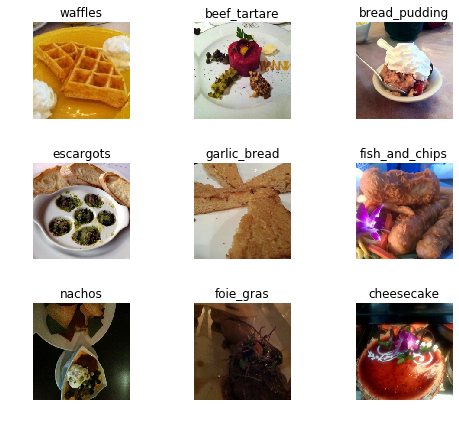

In [21]:
data.show_batch(rows=3, figsize=(7,6))

Print all the food items present in the data

In [22]:
print(data.classes)
len(data.classes),data.c

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

(101, 101)

Create a cnn learner with resnet34 and error_rate as its metric

In [23]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 105847029.26it/s]


Check the layers present in the model.

In [24]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

Fit the above model with 101 food items as itz last layer which is fully connected with resenet's last layer

In [25]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.079283,1.666343,0.427574,31:37
1,1.764364,1.395949,0.362277,31:13
2,1.576692,1.262388,0.329653,30:05
3,1.495878,1.230003,0.320248,30:17


Save the model as stage-1. It gets stored in the data folder within models directory

In [0]:
learn.save('stage-1')

Try to get images with top losses to see where the model fails in recognizing the food items with top losses.

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

Print images of top losses to sense why model fails at different food items. The text has prediction-actuallabel-loss-probability for the predicted class.

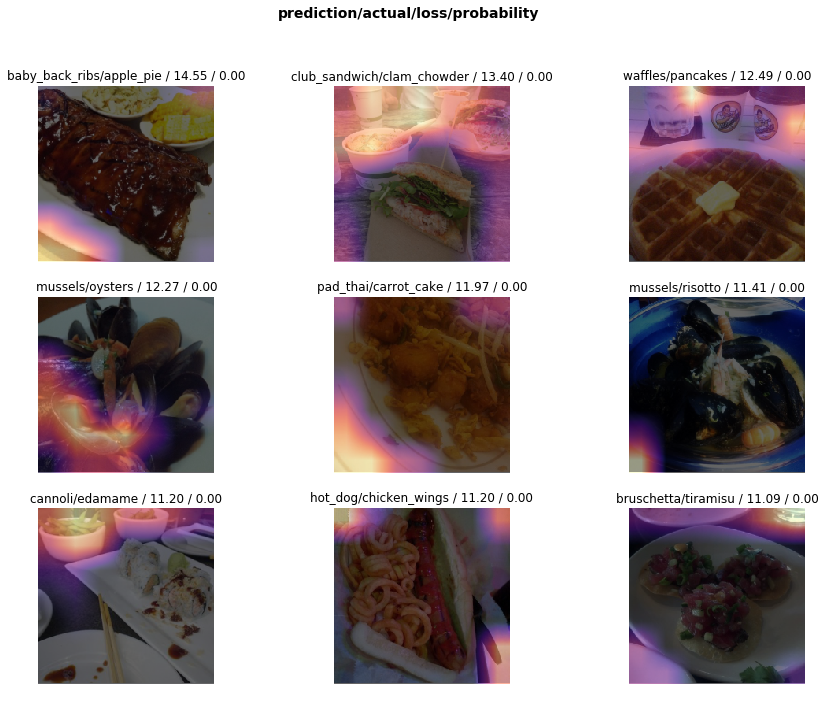

In [28]:
interp.plot_top_losses(9, figsize=(15,11))

Check most confused classes with the images which are mislabeled. We can clearly see that chocolate_mousse is ofter confused with chocolate_cake

In [30]:
interp.most_confused(min_val=2)

[('chocolate_mousse', 'chocolate_cake', 23),
 ('filet_mignon', 'steak', 22),
 ('ravioli', 'lasagna', 22),
 ('ice_cream', 'frozen_yogurt', 21),
 ('pulled_pork_sandwich', 'hamburger', 21),
 ('steak', 'filet_mignon', 21),
 ('lobster_bisque', 'clam_chowder', 20),
 ('donuts', 'beignets', 19),
 ('tuna_tartare', 'beef_tartare', 19),
 ('ravioli', 'gnocchi', 18),
 ('steak', 'prime_rib', 18),
 ('filet_mignon', 'pork_chop', 17),
 ('grilled_salmon', 'pork_chop', 17),
 ('tiramisu', 'chocolate_mousse', 17),
 ('foie_gras', 'pork_chop', 16),
 ('apple_pie', 'bread_pudding', 15),
 ('cheesecake', 'strawberry_shortcake', 15),
 ('gnocchi', 'shrimp_and_grits', 15),
 ('huevos_rancheros', 'omelette', 15),
 ('steak', 'baby_back_ribs', 15),
 ('apple_pie', 'baklava', 14),
 ('beef_tartare', 'tuna_tartare', 14),
 ('pork_chop', 'grilled_salmon', 14),
 ('ravioli', 'shrimp_and_grits', 14),
 ('steak', 'pork_chop', 14),
 ('chocolate_cake', 'chocolate_mousse', 13),
 ('crab_cakes', 'falafel', 13),
 ('dumplings', 'gyoza',

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


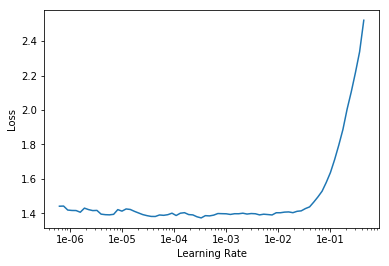

In [33]:
learn.recorder.plot()

Now we will use resnet50 to improve our predictions. We increase the image size and decrease the batch size. We normalize the data with imagenet_stats.

In [0]:
data = ImageDataBunch.from_folder(path_img, valid_pct=0.2, ds_tfms=get_transforms(), size=299, bs=bs//2
                                  ).normalize(imagenet_stats)

Create a cnn_learner with resnet50 model and  with metric as error_rate.

In [35]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 92469085.04it/s]


Find out optimum learning rate with the following lines of code.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


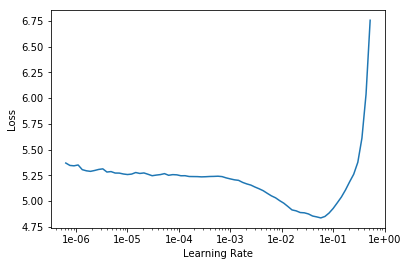

In [36]:
learn.lr_find()
learn.recorder.plot()

Unfreeze all the weights in the model and learn weights of all layers from the given dataset. We can clearly see that the error_rate decreased alot by 4rth epoch to 16.4%

In [37]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.626316,1.307029,0.343366,58:23
1,1.244247,0.984973,0.253564,58:03
2,0.828015,0.707997,0.184208,57:58
3,0.608860,0.630316,0.164653,58:09
